# Audio Processing for Noise Removal
This notebook documents the processing steps for removing noise from an audio track.  In particular, it was being applied to a specific audio track from YouTube lectures by Paul Dirac.  These lectures had audio with substantial background "hum" which I wished to remove and produce a cleaned-up audio track.  (This first lecture is:  https://www.youtube.com/watch?v=vwYs8tTLZ24 )

As a preprocessing step, used a site called https://peggo.tv/ to convert part of the YouTube to an MP3 extract.  Then I used an MP3 to WAV conversion tool called ffmpeg (https://www.ffmpeg.org/).

## Loading Data

In [398]:
import numpy as np
import scipy.signal as sig
import io
import soundfile as sf
import matplotlib.pyplot as plt
import pickle
import sounddevice as sd

inputFile = './wav/Dirac_1_of_4.wav'
data, samplerate = sf.read(inputFile)
print('Samplerate = ', samplerate)
data.shape

Samplerate =  44100


(5292288, 2)

## Displaying Data

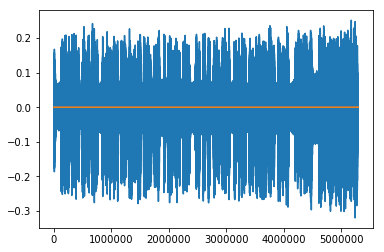

In [399]:
plt.plot(data)
plt.show()

In [400]:
len(data)/samplerate

120.0065306122449

The above snippet represents about 120 seconds (2 minutes) of data at the beginning of the lecture.  The entire lecture is about 1 hour long.

In [401]:
###sd.play(data, samplerate)
###sd.stop()

## Analyzing the Data

Zoom into the initial segment of audio.

In [402]:
len_extract = 4*samplerate # seconds of data
data_extract = data[:len_extract,0]
type(data_extract)

numpy.ndarray

In [403]:
###plt.plot(data_extract)
###plt.show()

In [404]:
###sd.play(data_extract, samplerate)
#sd.stop()

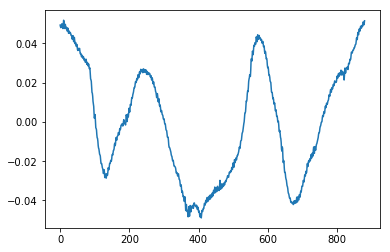

881

In [405]:
###noise_extract=data_extract[40000:80000]  # This is about one period of the noise waveform
noise_extract_length=881
noise_extract_start=40000
noise_extract=data_extract[noise_extract_start:noise_extract_start+noise_extract_length]  # This is about one period of the noise waveform
plt.plot(noise_extract)
plt.show()
len(noise_extract)

In [406]:
###sd.play(noise_extract, samplerate)

In [407]:
### Use the noise extract as a template, and compute the correlation with the original signal.
sig_noise_corr = np.correlate(data_extract, noise_extract)

In [408]:
###plt.plot(sig_noise_corr[30000:40000])
###plt.show()

## Correcting the Data

In [409]:
# See if we can cancel the noise from the noise portion of the timeseries itself.
nTile=int(np.ceil(len(data_extract)/len(noise_extract))) # number of duplicates
noise_tile = np.tile(noise_extract,nTile)
sample_start_index=40000+10*876
sample_end_index=70000
plot_extent=2000
relative_shift=0
noise_scale = 0.0
###plt.plot(data_extract[sample_start_index:sample_start_index+plot_extent],'b')
###plt.plot(noise_scale*noise_tile[sample_start_index+relative_shift:sample_start_index+plot_extent+relative_shift],'r')
# subtract noise
###signal_minus_noise=data_extract[sample_start_index:sample_end_index]-noise_scale*noise_tile[sample_start_index+relative_shift:sample_end_index+relative_shift]
# Create plot
#plt.plot(signal_minus_noise[:plot_extent],'g')
###plt.plot(noise_tile[:plot_extent],'g')
###plt.show()

In [410]:
###sd.play(signal_minus_noise, samplerate, loop=True)
###sd.stop()

In [411]:
# Do the noise cancellation here.
###relative_shift=580
###process_length=len(data_extract)-1000
###print('len(data_extract = ', len(data_extract))
###print('len(noise)tile = ', len(noise_tile))
###signal_minus_noise_final=data_extract[:process_length]-1.1*noise_tile[relative_shift:process_length+relative_shift]
###plt.plot(signal_minus_noise_final[50000:55000],'g')
###plt.show()

In [412]:
#sd.play(signal_minus_noise_final, samplerate)
#sd.stop()

In [413]:
#print(len(data_extract))
#print(len(noise_tile))

### Correcting the data, improved approach

test_window =  3524
40000/test_window =  11.350737797956867
num_data_segments =  50
max_corr_index =  300


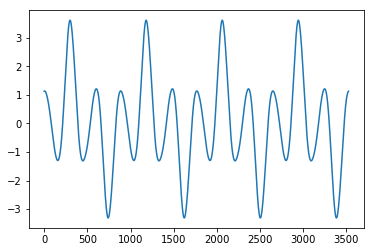

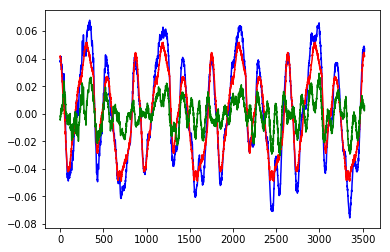

In [483]:
# Because of the slight phase shifting of the data in time, break up the original data record in shorter sections
# shift the noise model for maximum correlation, and then do the substraction.
# repackage the data extract and then listen to it.

test_window=4*noise_extract_length
noise_segment=noise_tile[:2*test_window]

print('test_window = ', test_window)
print('40000/test_window = ', 40000/test_window)

num_data_segments = int(np.floor(len(data_extract)/test_window))
print('num_data_segments = ', num_data_segments )

for iSegment in range(40):
    data_segment=data_extract[iSegment*test_window:(iSegment+1)*test_window]
    sig_noise_corr = np.correlate(data_segment, noise_segment)
    max_corr_index = np.argmax(sig_noise_corr)
    corrected_signal = data_segment-noise_segment[noise_extract_length-max_corr_index:test_window+noise_extract_length-max_corr_index]
    
print('max_corr_index = ', max_corr_index)
plt.plot(sig_noise_corr)
plt.show()
plt.plot(data_segment,'b')
###plt.plot(noise_segment[max_corr_index+shift_term:max_corr_index+shift_term+test_window],'r')
plt.plot(noise_segment[noise_extract_length-max_corr_index:test_window+noise_extract_length-max_corr_index],'r')
plt.plot(corrected_signal,'g')
plt.show()

In [ ]:
# the original data extracts
sd.play(data_extract, samplerate)
#sd.stop()

In [ ]:
# The corrected data extract
sd.play(modified_data_extract, samplerate)
#sd.stop()